In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
data = pd.read_csv('../../data/localdata/gg_data.csv')

In [3]:
data = data.drop(['Unnamed: 0'],axis=1)

In [4]:
# 할인율_한시의 결측치를 할인율_상시로 대체
data['할인율_상시'] = data['할인율_상시'].fillna(0)
data['구매한도_월'] = data['구매한도_월'].fillna(0)
data['구매한도_연'] = data['구매한도_월'].fillna(0)
data['할인율_한시'] = np.where(pd.notnull(data['할인율_한시']) == True, data['할인율_한시'], data['할인율_상시'])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   시군           31 non-null     object 
 1   총인구수         31 non-null     float64
 2   할인율_상시       31 non-null     float64
 3   할인율_한시       31 non-null     float64
 4   구매한도_월       31 non-null     float64
 5   구매한도_연       31 non-null     float64
 6   지역화폐사용액(천원)  31 non-null     float64
 7   경제활동참가율      31 non-null     float64
 8   서비스업사업체비율    31 non-null     float64
 9   제조업사업체비율     31 non-null     float64
 10  도소매업사업체비율    31 non-null     float64
 11  운수업사업체비율     31 non-null     float64
 12  제조업종사자비율     31 non-null     float64
 13  도소매업종사자비율    31 non-null     float64
 14  운수업종사자비율     31 non-null     float64
 15  농업가구비율       31 non-null     float64
 16  합계출산율        31 non-null     float64
 17  도시지역면적       31 non-null     int64  
dtypes: float64(16), int64(1), object(1)
memory usage: 4.

In [6]:
# sns.pairplot(data, hue="시군", size=2)
# plt.show()

### 1) Normalization

In [7]:
x = data.drop(['시군'], axis=1)
y = data['시군'].values

In [8]:
# x객체에 x를 표준화한 데이터를 저장
trans_x = StandardScaler().fit_transform(x.values)

In [9]:
x_df = pd.DataFrame(trans_x, columns=x.columns)

### 2) PCA

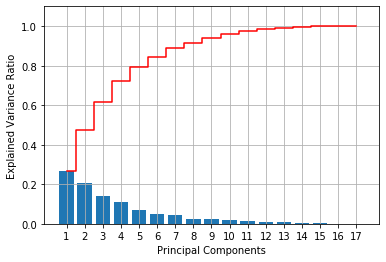

In [10]:
pca = PCA(n_components=x_df.shape[1])
pca.fit(x_df)
explained_variance_ratio = pca.explained_variance_ratio_

def explained_variance_ratio_plot(explained_variance_ratio):
    x_axis = range(1, len(explained_variance_ratio)+1)
    plt.bar(x_axis, explained_variance_ratio,
            align = 'center', label = 'Individual Explained Variance Ratio')
    plt.step(x_axis, np.cumsum(explained_variance_ratio),
             where = 'mid', color='red', label='Cumulative Explained Variance Ratio')
    plt.ylim(0, 1.1)
    plt.xticks(x_axis)
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance Ratio')
    plt.grid()
    plt.show()

explained_variance_ratio_plot(explained_variance_ratio)

In [11]:
df_v = pd.DataFrame(np.cumsum(explained_variance_ratio[:10]), index=['PC1','PC2','PC3','PC4','PC5',
                                                                    'PC6','PC7','PC8','PC9','PC10'], columns=['Cum_V_ration'])

df_v

##주성분 7개 원래 데이터의 약 90% 설명

,Cum_V_ration
PC1,0.268292
PC2,0.474630
PC3,0.615495
PC4,0.723645
PC5,0.794486
PC6,0.843017
PC7,0.889943
PC8,0.915541
PC9,0.939211
PC10,0.957864


In [12]:
printcipalComponents = pca.fit_transform(x_df)
#principalDf = pd.DataFrame(data=printcipalComponents, columns = ['principal component1', 'principal component2'])


In [13]:
pca_data = pd.DataFrame(printcipalComponents[:,:7], columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7'], index = y)

In [14]:
pca_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
수원시,-1.619437,0.729999,-0.613208,2.023489,-0.538073,-0.210794,0.302403
성남시,-0.051796,4.935787,2.110950,2.283977,-0.415976,-1.699435,-0.463476
의정부시,-2.292301,0.690759,0.108035,-0.364486,-0.536567,0.326868,0.293463
안양시,-0.982912,1.010870,0.845584,0.240487,0.055557,-0.375253,-0.572105
부천시,0.047996,1.033013,-0.233562,1.028378,-0.272207,0.517339,-1.299623
광명시,-1.796285,0.539747,-0.538186,-1.279277,0.157101,-0.077066,-0.694161
평택시,0.821190,-0.255195,0.067825,0.209718,-0.845804,-0.710459,0.361335
동두천시,-1.300482,0.380035,1.052167,-1.536371,-1.278292,1.521124,0.255706
안산시,2.123972,2.676202,0.612033,-0.082061,-2.158880,0.077267,-1.423028
고양시,-2.110958,2.023540,-1.014500,1.411742,0.228208,0.026768,0.277778


### 3) K-Means Clustering

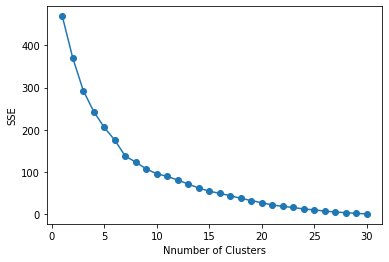

In [15]:
def elbow(x, n):
    sse = []
    for i in range(1, n):
        km = KMeans(n_clusters=i, init='k-means++', random_state=0)
        km.fit(x)
        sse.append(km.inertia_)
    plt.plot(range(1, n), sse, marker='o')
    plt.xlabel('Nnumber of Clusters')
    plt.ylabel('SSE')
    plt.show()
    
elbow(pca_data, 31)

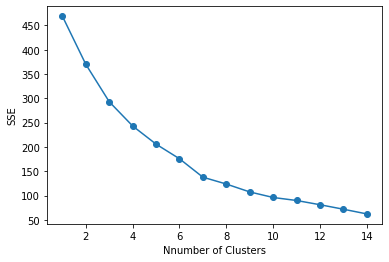

In [16]:
elbow(pca_data, 15)

In [17]:
kmeans = KMeans(n_clusters=7).fit(pca_data)

In [18]:
pca_data['cluster_id'] = kmeans.labels_

In [19]:
clust_data = pca_data

In [23]:
clust_data.sort_values(by='cluster_id')

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,cluster_id
화성시,3.933028,-1.552540,-2.090041,2.921732,0.228735,0.169151,-0.196820,0
안성시,1.609448,-2.281633,-0.361541,0.460182,0.028797,-0.004423,-0.217143,0
시흥시,2.882318,-0.100701,-1.171590,0.706351,0.873228,0.142746,-1.341396,0
광주시,1.558395,0.231943,-2.078554,-1.289442,0.746577,-0.381548,0.736583,0
파주시,1.042632,-0.807754,-0.551833,-0.352951,-0.401358,0.562748,0.008702,0
포천시,3.203169,-1.348756,0.651236,-0.653428,0.110533,1.344464,-2.020419,0
양주시,1.152921,-1.368643,-1.109267,-0.002544,0.559456,1.604011,-0.058306,0
안산시,2.123972,2.676202,0.612033,-0.082061,-2.158880,0.077267,-1.423028,1
성남시,-0.051796,4.935787,2.110950,2.283977,-0.415976,-1.699435,-0.463476,1
과천시,-3.799181,0.716727,2.186685,-0.498336,0.813531,2.129426,-0.148312,2


In [21]:
data['cluster_id'] = kmeans.labels_

In [27]:
data.to_csv('../../data/localdata/cluster_data.csv')